1. Genere un archivo con un millon de numeros aleatorios (serán flotantes entre 0 y 1),
este representara el vector a ordenar en las pruebas de los algoritmos de ordenamiento

### Alumno: Roque Sosa Owen Haziel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

random_numbers = np.random.rand(1000000)

nombre_archivo = "numeros_aleatorios.txt"

with open(nombre_archivo, "w") as archivo:
    for numero in random_numbers:
        archivo.write(str(numero) + "\n")

print(f"Se han generado y guardado {len(random_numbers)} números aleatorios en '{nombre_archivo}'.")

Se han generado y guardado 1000000 números aleatorios en 'numeros_aleatorios.txt'.


2. Implemente los siguientes algoritmos:
* Bubble sort
* Heap sort
* Insertion sort
* Selection sort
* Shell sort
* Merge sort
* Quick sort


In [ ]:
def conversion_arreglo(nombre_archivo):
    """Lee el archivo generado con números aleatorios y los convierte en un arreglo."""
    try:
        with open(nombre_archivo, "r") as archivo:
            numeros = [float(line.strip()) for line in archivo]
        return numeros
    except FileNotFoundError:
        print(f"El archivo '{nombre_archivo}' no se encontró.")
        return []

3. Analizar la complejidad computacional de cada uno.

# BubbleSort

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j] # Swap

1. Peor caso: $O(n^2)$ - El rendimiento empeora cuadráticamente a medida que aumenta el tamaño del arreglo, especialmente cuando está completamente desordenado.

2. Caso promedio: $O(n^2)$ - En promedio, el algoritmo requiere realizar un número cuadrático de comparaciones e intercambios.

3. Mejor caso (con optimización): $O(n)$ - En el mejor caso, si se implementa una optimización para detener el algoritmo cuando no se realizan intercambios, la complejidad puede reducirse a lineal, pero sigue siendo ineficiente para arreglos grandes en comparación con otros algoritmos de ordenamiento más eficientes.

# HeapSort

In [ ]:
def heapify(arr, n, i):
    # Inicializar el nodo raíz más grande como el índice actual
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    # Comprobar si el hijo izquierdo del nodo raíz existe y es mayor que el nodo raíz actual
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Comprobar si el hijo derecho del nodo raíz existe y es mayor que el nodo raíz actual
    if right < n and arr[right] > arr[largest]:
        largest = right

    # Cambiar el nodo raíz actual si no es el más grande
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    # Construir un max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extraer elementos uno por uno
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        heapify(arr, i, 0)

1. Peor caso: $O(n \: log \: n)$ - El peor caso ocurre cuando el arreglo está completamente desordenado. *heapify* tiene una complejidad de $O(log \: n)$, y se llama *n* veces en el peor caso durante la construcción del heap binario.

2. Caso promedio: $O(n \: log \: n)$

3. Mejor caso: $O(n \: log \: n)$ - El mejor caso es similar al peor caso, ya que Heap Sort siempre realiza el mismo número de operaciones para construir y ordenar el heap binario.

#InsertionSort


In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

1. Peor caso: $O(n^2)$ - El peor caso ocurre cuando el arreglo está completamente desordenado, y en cada iteración del algoritmo se debe recorrer todo el arreglo para encontrar la posición correcta para el elemento actual.

2. Caso promedio: $O(n^2)$ - En promedio, el Insertion Sort también tiene una complejidad cuadrática, ya que el número de comparaciones e intercambios crece cuadráticamente con el tamaño del arreglo.

3. Mejor caso: $O(n)$ - El mejor caso ocurre cuando el arreglo ya está ordenado o casi ordenado. En este caso, el algoritmo solo realiza una comparación por elemento y no realiza intercambios, lo que da como resultado una complejidad lineal.

# SelectionSort

In [ ]:
def selection_sort(arr):
    n = len(arr)

    for i in range(n):
        # Encontrar el índice del mínimo elemento en el arreglo no ordenado
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j

        # Intercambiar el elemento mínimo encontrado con el primer elemento no ordenado
        arr[i], arr[min_index] = arr[min_index], arr[i]

1. Peor caso: $O(n^2)$ - El peor caso ocurre cuando el arreglo está completamente desordenado. En cada iteración, se busca el elemento mínimo en la parte no ordenada del arreglo, lo que requiere *n - i* comparaciones en la iteración *i*, donde *n* es la longitud del arreglo.

2. Caso promedio: $O(n^2)$ - En promedio, el Selection Sort también tiene una complejidad cuadrática, ya que el número de comparaciones e intercambios crece cuadráticamente con el tamaño del arreglo.

3. Mejor caso: $O(n^2)$ - El mejor caso también es cuadrático, ya que incluso si el arreglo ya está parcialmente ordenado, el algoritmo seguirá realizando el mismo número de comparaciones e intercambios.

# ShellSort

In [ ]:
def shell_sort(arr):
    n = len(arr)
    intervalo = n // 2  # Inicializar el intervalo

    while intervalo > 0:
        for i in range(intervalo, n):
            valor = arr[i]
            j = i

            while j >= intervalo and arr[j - intervalo] > valor:
                arr[j] = arr[j - intervalo]
                j -= intervalo

            arr[j] = valor

        intervalo //= 2  # Reducir el intervalo a la mitad

La complejidad del Shell Sort depende del incremento (intervalo) utilizado para dividir y ordenar el arreglo. La complejidad generalmente se describe como una función de Knuth (también conocida como la secuencia de incrementos de Knuth).

1. Peor caso: $O(n^2)$ - En el peor caso, cuando se utiliza la secuencia de incrementos de Knuth, el Shell Sort tiene una complejidad cuadrática.

2. Caso promedio: En la práctica, la complejidad del Shell Sort varía según el incremento utilizado. Se ha demostrado que la secuencia de incrementos de Knuth produce buenos resultados en la mayoría de los casos, pero en general, el rendimiento puede ser difícil de predecir. En promedio, el Shell Sort tiende a ser más rápido que otros algoritmos de ordenamiento cuadráticos como el **Insertion Sort** o el **Selection Sort**. En general, se podría aproximar a $O(n \: log \: n)$.

3. Mejor caso: $O(n \: log \: n)$ - El mejor caso ocurre cuando se utiliza una secuencia de incrementos específica que produce un rendimiento óptimo. En ese caso, la complejidad se aproxima a $O(n \: log \: n)$.

# MergeSort

In [ ]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

1. Peor caso: $O(n \: log \: n)$ - En el peor caso, Merge Sort siempre divide el arreglo en mitades iguales y luego combina las mitades ordenadas. El número de comparaciones e intercambios realizados es $O(n \: log \: n)$.

2. Caso promedio: $O(n \: log \: n)$ - En promedio, el Merge Sort también tiene una complejidad de $O(n \: log \: n)$, ya que divide y combina las mitades de manera consistente, independientemente de la distribución de los datos.

3. Mejor caso: $O(n \: log \: n)$ - El mejor caso ocurre cuando el arreglo ya está parcialmente ordenado. Aunque Merge Sort aún divide y combina, el número de comparaciones e intercambios es el mismo que en el peor caso, lo que da como resultado una complejidad de $O(n \: log \: n)$.

# QuickSort

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        menores = [x for x in arr[1:] if x <= pivot]
        mayores = [x for x in arr[1:] if x > pivot]
        return quick_sort(menores) + [pivot] + quick_sort(mayores)

1. Peor caso: $O(n^2)$ - El peor caso ocurre cuando el pivote elegido divide el arreglo de manera desequilibrada en dos subarreglos, uno de tamaño *0* y otro de tamaño *n-1*. Esto sucede en el caso en que el arreglo ya esté ordenado o casi ordenado y el primer elemento se elija como pivote en cada iteración.

2. Caso promedio: $O(n \: log \: n)$. - En promedio, el Quick Sort tiene una complejidad de $O(n \: log \: n)$.. Esto se debe a que, en promedio, el pivote divide el arreglo de manera equitativa y se realiza un número logarítmico de divisiones.

3. Mejor caso (raro): $O(n \: log \: n)$. - El mejor caso ocurre cuando el pivote divide el arreglo de manera equitativa en cada iteración. Esto puede suceder en algunos escenarios, pero no es común.

4. Evaluar y comparar sus algoritmos usando el archivo generado (variando el tamaño del vector) y construir
una(s) grafica(s) comparativa(s).

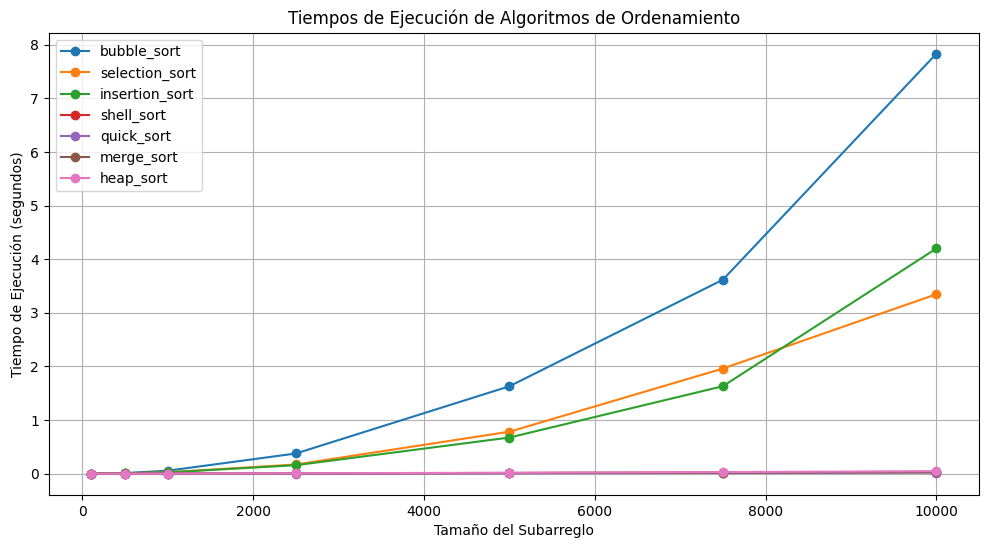

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def medir_tiempo(algoritmo, arreglo):
    inicio = time.time()
    algoritmo(arreglo.copy())  # Hacer una copia del arreglo para no modificar el original
    fin = time.time()
    return fin - inicio

with open("numeros_aleatorios.txt", "r") as archivo:
    numeros = [float(line.strip()) for line in archivo]

tamahnos_subarreglos = [100, 500, 1000, 2500, 5000, 7500, 10000]

algoritmos = [bubble_sort, selection_sort, insertion_sort, shell_sort, quick_sort, merge_sort, heap_sort]

resultados = {algoritmo.__name__: [] for algoritmo in algoritmos}
for algoritmo in algoritmos:
    for tamaño in tamahnos_subarreglos:
        subarreglo = random.sample(numeros, tamaño)
        tiempo = medir_tiempo(algoritmo, subarreglo)
        resultados[algoritmo.__name__].append(tiempo)

# Histograma

plt.figure(figsize=(12, 6))
for algoritmo, tiempos in resultados.items():
    plt.plot(tamahnos_subarreglos, tiempos, marker='o', label=algoritmo, linestyle='-')

plt.xlabel("Tamaño del Subarreglo")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.title("Tiempos de Ejecución de Algoritmos de Ordenamiento")
plt.grid(True)
plt.show()